In [106]:
import ptracer as pt
import numpy as np
from importlib import reload
from forces import ray_tracer as rtf
from tqdm.notebook import tqdm
from random import random

%matplotlib notebook
import matplotlib.pyplot as plt

In [104]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [105]:
pos = np.array([-0e-6, 0, 100e-6])
m = pt.MeshTO(pos, "sphere.obj", 5e-6, n_in=1.52)
m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
rf = pt.AdaptiveGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-6, 300, 532, pos+[0,0,-5.1e-6], 5e-6)
s = pt.Scene(rf, [m])
s.run(limit=5)
s.propagate(1e-6)
print(s.momentum)

TypeError: 'int' object is not callable

<IPython.core.display.Javascript object>


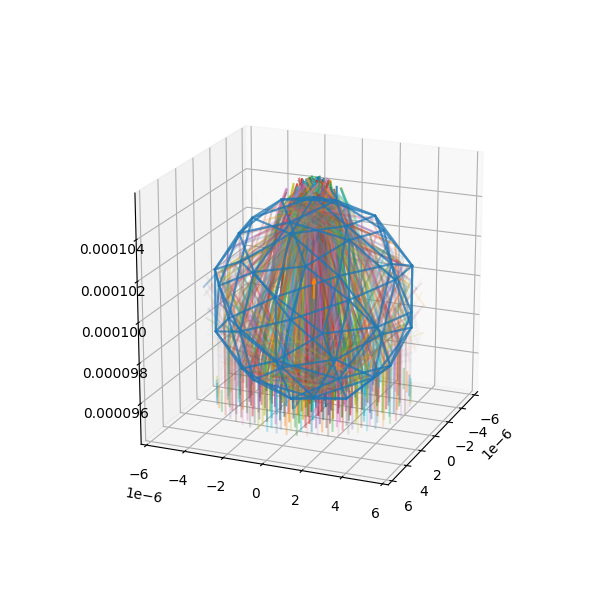

In [46]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax, m_quiver=True, m_quiver_kwargs={"zorder":10, "color": "tab:orange"})

In [110]:
def rangle():
    return 2*np.pi*random()

In [127]:
moms = []
poss = []
xs = np.linspace(-1e-6, 1e-6, 21)
ys = np.linspace(-1e-6, 1e-6, 21)
for x in tqdm(xs):
    for y in ys:
        pos = np.array([x, y, 100e-6])
        poss.append(pos)
        m = pt.MeshTO(pos, "simple_sphere.obj", 5e-6, n_in=1.52)
        m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
        rf = pt.AdaptiveGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-6, 300, 532, pos+[0,0,-5.1e-6], 5e-6, angle=rangle)
        s = pt.Scene(rf, [m])
        s.run(limit=5)
        moms.append(s.momentum)
#         print(s.momentum)
#         print(moms)
#         print("-"*15)
moms = np.array(moms)
poss = np.array(poss)

<IPython.core.display.Javascript object>


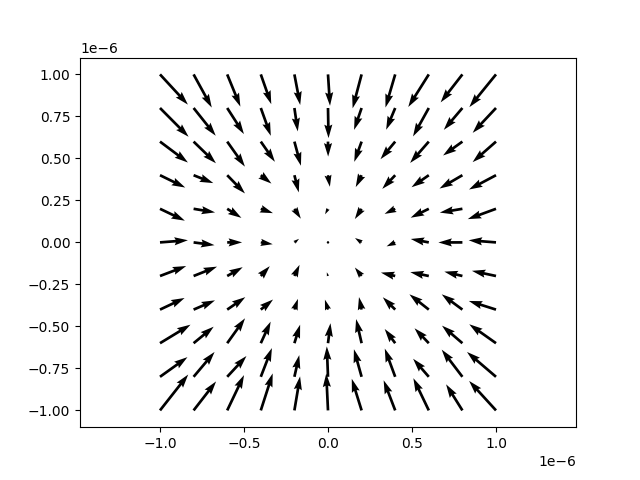

(-1.1e-06, 1.1e-06, -1.1e-06, 1.1e-06)

In [126]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid(xs, ys)
ax.quiver(poss[:,0], poss[:,1], moms[:,0], moms[:,1])
ax.axis("equal")